# Linear Regression

**It is a method for modelling the relationship between a 'dependent' scalar variable $y$ and one or more 'explanatory' variables $\overrightarrow{x}$.** 

## Simple Linear Regression 

1.Single explanatory value.<br>
2.We want to approximate price of houses if we know sizes.<br>
<br>
$\ H(x) = b_0 + b_1x $<br>
<br>
*Where*<br>
$\ H(x) $ is the the **dependent** variable(What we are trying to predict).<br> 
$\ x $    is the the **independent/explanatory** variable(What we use to make predictions).<br> 

The equation above is the equation of a **straight line**.<br>
**What does this mean??**<br>
If we have a new $\ x $ (size of the house)  we can get the approximate price for that size $\ H(x) $.
<br>
We find $\ b_0 $  and $\ b_1 $ using **optimization algoritms**!

## Multiple Linear Regression

1. Several explanatory variables.
2. We want to know the approximate price of houses if we know sizes,number of rooms etc.

## Optimization 

### Mean Sqaured Error (MSE) 

Given $H(x)$ and $y$ where $H(x)$ is the prediction and $y$ is the required output.<br>
$let \ \epsilon\ = [{H(x) - y}]$<br>
$if \ \epsilon_i^2\ $ is small then our predictions are **Good** otherwise they are **Bad**.<br>
$ MSE = \sum_{i=1}^{n}\epsilon_i^2\ $

### R Sqaured Statistic (R^2) 

The $R^2$ statistic is defined as:  $R^2 = 1 - \frac{RSS}{TSS}$  **The higher $R^2$, the better the model fits the data**.<br>
It measures how **strong** a linear relationship is between two variables.<br>
1.**RSS** (Residual Sum Of Squares) : Same as **MSE**.<br>
2.**TSS** (Total Sum Of Sqaures) : It is a measure of **variance** in $\overrightarrow{y}$.<br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$TSS = \frac{1}{n} \sum_{i=1}^{n} (y-\mu)^2 $<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;*where* $\mu$ is the average value $\forall y$.

### What we need to do!

We need to find $ min_b[{H(x) - y}]^2 $.<br>
We find this minimum by tuning $ b_0$ and $b_1$. 

### Ways to do this! 

#### 1. Design Matrix Approach


We can transform the problem into linear equations and use the standard method (using matrix operations).<br>
$\overrightarrow{b} = (X'X)^{-1}X'\overrightarrow{y}$
<br>
Use this approach only for low dimensional problems.We have an overhead (Matrix inversion is $O(N^3)$.

#### 2. Gradient Descent 

It is first order **iterative optimization algorithm** for finding the **minimum of a function**.<br>
For our purposes this function is the $MSE$.<br>
<br>
If we plot all posiible values of the cost function $C(\overrightarrow{b})$ in the $z-axis$, all possible values of $b_0$ in the $x-axis$ and all possible values of $b_1$ on the $y-axis$ we end up with a **3D surface** that represents this relation between  $C(\overrightarrow{b})$  and $b_1$,$b_0$.<br>
This **surface** is going to have a **minima**.
This **minima** represents those values for $b_1$ and $b_0$ where the error is minimum.<br>
If we plug $b_1$ and $b_0$ into our equation $H(x) = b_0 + b_1x$ we get the **regression line**.<br>
<br>
To compute the **minima** we need to know the **negative gradient** of the Cost function : $-\nabla C(\overrightarrow{b})$.<br>
To find this gradient we have to find **two partial derivatives** : $\frac{\partial C(b)}{\partial b_0} \ and \ \frac{\partial C(b)}{\partial b_1}$<br>

#### Algorithm for gradient descent

make iterations **{**<br>
$b_0 = b_0 - \alpha \frac{\partial C(b)}{\partial b_0}$<br>
$b_1 = b_1 - \alpha \frac{\partial C(b)}{\partial b_1}$<br>
**}** <br>
<br>
Here $b_0$ is updated with its previous value minus that partial derivative and the same goes for $b_1$.<br>
$\alpha$ is the learning rate or the rate at which we descend down the hill or **step size**.<br>
Thus the point $(b_0,b_1)$ moves towards its min. value for the cost function.




Go here for the visualization of a gradient descent problem: http://yulijia.net/vistat/2013/03/gradient-descent-algorithm-with-r

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math

We are going to use a housing dataset and try to find a linear relationship between house area(sq. feet) and house price.

In [24]:
#read dataset 
house_data = pd.read_csv("house_prices.csv")

In [25]:
#initialize x and H(x)
size = house_data["sqft_living"] 
price = house_data["price"]

In [26]:
#Covert dataframes to numpy_arrays ... As sklearn uses np.arrays (Matrices)
#-1 as an unknown dimension.The dataframes size and house have the index of the value and the value.
x = np.array(size).reshape(-1,1) 
y = np.array(price).reshape(-1,1)

In [27]:
#Use the linear regression model and train the data
model = LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
#MSE and R values
mse = mean_squared_error(x,y)
print("MSE: ", math.sqrt(mse))
print("R squared value: ", model.score(x,y))

MSE:  650965.7788663033
R squared value:  0.49285321790379316


R sqaured value is **0.49** nowhere close to **1**. So we can conclude that there is **NO LINEAR RELATIONSHIP BEETWEEN HOUSE-PRICE AND HOUSE-AREA** 

In [32]:
#We can get the values for b_0 and b_1
print(model.coef_[0])
print(model.intercept_[0])

[280.6235679]
-43580.74309447361


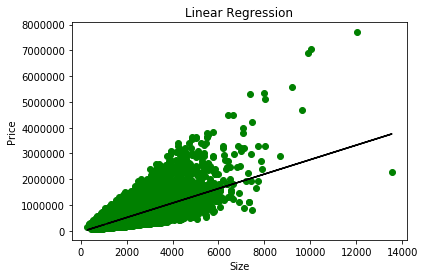

In [30]:
#visualize the regression line in the graph of x vs H(x)
plt.scatter(x,y,color="green")
plt.plot(x,model.predict(x),color="black")
plt.title("Linear Regression")
plt.xlabel("Size")
plt.ylabel("Price")
plt.show()

In [31]:
#Model Prediction
x = 2000
print(f"Prediction by the model for {x} is {model.predict([[x]])}")

Prediction by the model for 2000 is [[517666.39270042]]


----------------------------------------------------------**END**----------------------------------------------------------